# Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Basic libraries
#
import time
import pandas    as pd
import numpy     as np
from   tqdm      import tqdm


# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Visualization library
#
import matplotlib.pyplot   as plt 



# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
# User libraries
#
from utils.non_parametric_tests import *

# Import data

In [3]:
df = pd.DataFrame([])
nProblems = 100

df['Method 1'] = np.random.rand(nProblems)
df['Method 2'] = np.random.rand(nProblems)
df['Method 3'] = np.random.rand(nProblems)
df['Method 4'] = np.random.rand(nProblems)

df.head( 3 )

,Method 1,Method 2,Method 3,Method 4
0,0.021057,0.111950,0.179469,0.947590
1,0.900340,0.154557,0.353351,0.130969
2,0.024002,0.826815,0.967837,0.154635


# Statistical analysis

## Friedman Aligned Rankings

In [4]:
T, p_value, rankings_avg, rankings_cmp = friedman_aligned_ranks_test( df )

print('[INFO] FAR: %.3f (p-value: %.5f)' % (T, p_value))

d = {}
for i, feature in enumerate(df.columns):
    d[ feature ] = rankings_cmp[i] 

[INFO] Number of methods:   4
[INFO] Number of problems:  100
[INFO] FAR: 2.982 (p-value: 0.39440)


In [5]:
Ranking = pd.DataFrame( [] )
Ranking['Methods'] = df.columns
Ranking['FAR']     = rankings_avg

Ranking.sort_values(by = 'FAR')

,Methods,FAR
3,Method 4,188.12
2,Method 3,196.56
0,Method 1,198.06
1,Method 2,219.26


## Finner post-hoc test

In [6]:
comparisons, z_values, p_values, adj_p_values = finner_test( d )

Finner = pd.DataFrame( [] )
Finner['Comparisons']     = comparisons
Finner['APV']             = adj_p_values
Finner['Null hypothesis'] = Finner['APV'].apply(lambda x: 'Rejected' if x < 0.05 else 'Failed to reject')

Finner

[INFO] Control method:  Method 4


,Comparisons,APV,Null hypothesis
0,Method 4 vs Method 2,0.161008,Failed to reject
1,Method 4 vs Method 1,0.691291,Failed to reject
2,Method 4 vs Method 3,0.691291,Failed to reject


# Finner-multitest post-hoc test

In [7]:
comparisons, z_values, p_values, adj_p_values = finner_multitest(d)

Finner = pd.DataFrame( [] )
Finner['Comparisons']     = comparisons
Finner['APV']             = adj_p_values
Finner['Null hypothesis'] = Finner['APV'].apply(lambda x: 'Rejected' if x < 0.05 else 'Failed to reject')

Finner

,Comparisons,APV,Null hypothesis
0,Method 2 vs Method 4,0.296092,Failed to reject
1,Method 2 vs Method 3,0.417880,Failed to reject
2,Method 1 vs Method 2,0.417880,Failed to reject
3,Method 1 vs Method 4,0.691291,Failed to reject
4,Method 3 vs Method 4,0.691291,Failed to reject
5,Method 1 vs Method 3,0.926904,Failed to reject


# Performance profiles

In [8]:
from utils.PerformanceProfiles import *

            Method 1 solved 25.00% of cases with the best(least) score
            Method 2 solved 24.00% of cases with the best(least) score
            Method 3 solved 24.00% of cases with the best(least) score
            Method 4 solved 26.00% of cases with the best(least) score


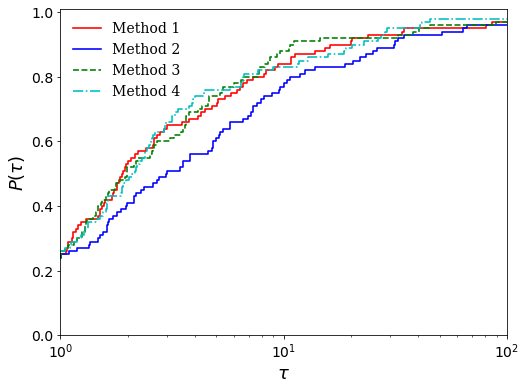

In [9]:
perfprof(df, 
         linespecs = ['r-', 'b-', 'g--', 'c-.'], 
         digit = 3,
         legendnames = df.columns,
         thmax = 100, figsize = (8, 6))

plt.xscale('log')